In [1]:
import numpy as np

Activiation function(The function tells neuron to activate or not, we call it that because it tells neuron whether the current information is close to our original answer or not)

## First of all we have our  i.e, sigmoid or ReLu. I'll be implementing both here are seeing what's the difference between them,

### A Sigmoid function is a mathematical function which has a characteristic S-shaped curve [[1]](https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function)

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

To further demostrate the above I'll draw a plot for it

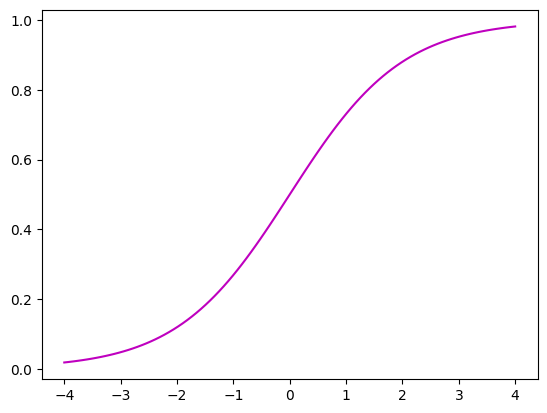

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-4,4,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y,'-m')
plt.show()


### ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks [[2]](https://deepai.org/machine-learning-glossary-and-terms/relu).

In [15]:
def relu(x):
  return  x * (x > 0)

I'm about to draw the graph of the above

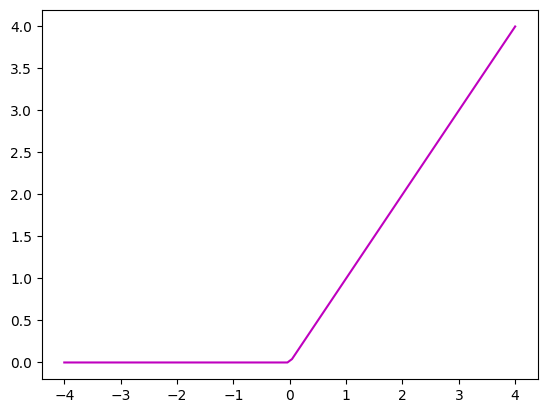

In [16]:
import matplotlib.pyplot as plt

x = np.linspace(-4,4,100)

y = relu(x)

plt.plot(x,y,'-m')
plt.show()


## Neural Network

It initializes random weight matrices (𝑊1, 𝑊2, 𝑊3) for each layer. During the forward pass, the input passes through each layer, and the sigmoid activation function is applied to the resulting values (delta1, delta2, delta3) to obtain the layer outputs (layer1, layer2, output). In the backpropagation step, the error between the predicted output and the true labels is calculated. The deltas are computed for each layer by applying the derivative of the sigmoid function(means multiplying it by 2) to the layer outputs and multiplying them with the error and weight matrices. The weight matrices are then updated using the learning rate and the dot products of the layer outputs and deltas. Finally, the rounded output values are returned.

In [50]:
def neural_network(input, labels, epochs, learning_rate):
  W1 = np.random.rand(2, 4)
  W2 = np.random.rand(4, 8)
  W3 = np.random.rand(8, 1)
  for epoch in range(0, epochs):
    layer1 = sigmoid(np.dot(input, W1))
    layer2 = sigmoid(np.dot(layer1, W2))
    output = sigmoid(np.dot(layer2, W3))

    error = labels - output
    delta3 = 2 * error * output * (1 - output)
    delta2 = delta3.dot(W3.T) * layer2 * (1 - layer2)
    delta1 = delta2.dot(W2.T) * layer1 * (1 - layer1)

    W3 += learning_rate * layer2.T.dot(delta3)
    W2 += learning_rate * layer1.T.dot(delta2)
    W1 += learning_rate * input.T.dot(delta1)

  return np.round(output.squeeze())


In [51]:
input = np.array([[0,0],[0,1],[1,0],[1,1]])

val = neural_network(input,np.array([[0],[1],[1],[1]]), 3000, 0.1)

In [52]:
print("OR", val)

OR [0. 1. 1. 1.]
